In [2]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Clean horse racing file
clean_race = 'clean.csv'

#Read csv
clean = pd.read_csv(clean_race)
clean

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,...,horse_owner,horse_trainer,horse_race_degree,horse_win_value,horse_psf_rate,horse_psf_rank,Horse_starting_box_no,horse_margin,horse_late_start,horse_rate
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,NİMET ARİF KURTEL,TAMER TURAN,1.31.26,1.50,49,1,1,9 Lengths,NaN,42
1,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,AHMET KURT,TUNCAY PELEN,1.33.05,3.75,20,2,4,Half Lengths,NaN,43
2,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,BÜLENT BAYBURAN,KAZIM ŞENGEL,1.33.17,28.70,3,6,3,3 Lengths,NaN,33
3,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,DİLEK ÖKTEN,ALİ RIZA AYDIN,1.33.65,14.85,3,5,6,4 Lengths,NaN,39
4,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,SEMİH KATI,MURAT TÜRKOĞLU,1.34.30,4.55,17,3,5,NaN,NaN,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278,2024-01-31,Şanlıurfa,8,Handicap 14,Undefined,4 Years Old,Arabian,1700,Dirt,Good Going,...,MEHMET ŞAH ATAKAYA,YELİZ BAYSAL,2.17.56,20.50,3,11,7,NaN,NaN,42
4279,2024-01-31,Şanlıurfa,8,Handicap 14,Undefined,4 Years Old,Arabian,1700,Dirt,Good Going,...,MAHMUT TEKİN,MAHSUM BARCİN,2.17.92,34.90,2,14,8,NaN,NaN,32
4280,2024-01-31,Şanlıurfa,8,Handicap 14,Undefined,4 Years Old,Arabian,1700,Dirt,Good Going,...,ALİ POLAT,MURAT ALTIN,2.18.09,9.45,5,7,6,NaN,NaN,34
4281,2024-01-31,Şanlıurfa,8,Handicap 14,Undefined,4 Years Old,Arabian,1700,Dirt,Good Going,...,HÜSEYİN ÇELİK,MEHMET DEMİROL,2.20.75,24.35,2,15,9,NaN,NaN,42


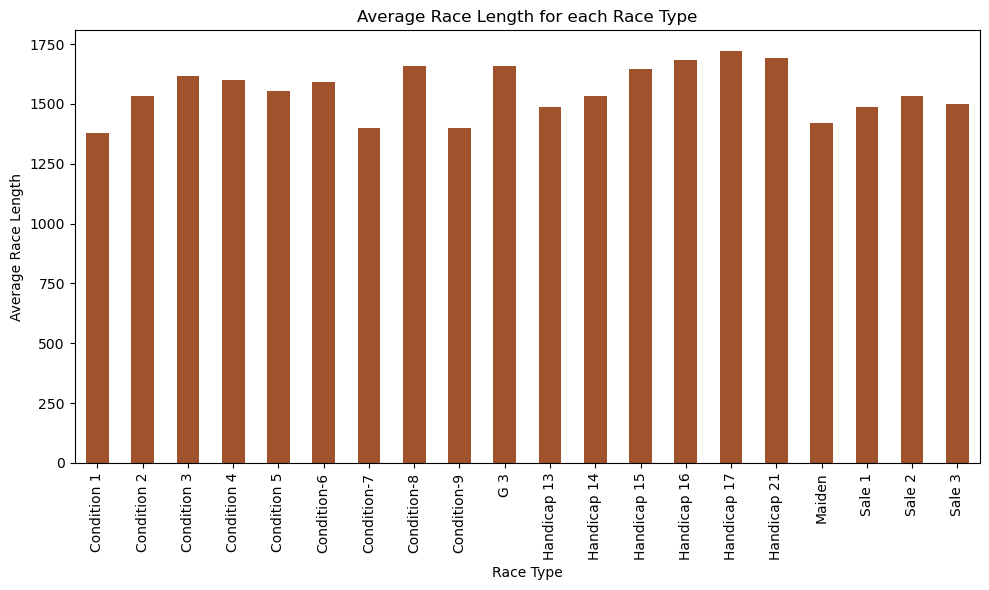

In [3]:
#What is the average race length for each race type? 
avg_race_length = clean.groupby('race_type')['race_length'].mean()


# Create a bar plot for average race length by race type
plt.figure(figsize=(10, 6))
avg_race_length.plot(kind='bar', color='sienna')
plt.title('Average Race Length for each Race Type')
plt.xlabel('Race Type')
plt.ylabel('Average Race Length')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [17]:
#Are there specific race types where certain horses or jockeys perform particularly well?
#Get the 1st place performers for each race type
first_winners = clean[clean['result'] == 1]
top_1_by_race_type = first_winners.groupby('race_type').first()
top_1_by_race_type[['horse_name', 'jockey_name', 'result']]


,horse_name,jockey_name,result
race_type,,,
Condition 1,LOOK AT THE STAR,NEVZAT AVCİ,1
Condition 2,MY REVERIE,TUGAY ALICI,1
Condition 3,CANIM İLAYDA,ALİ YILDIZ,1
Condition 4,DÜNDARZADE,TOLGA YILDIZ,1
Condition 5,KALBİMDESİN,AHMET ÇELİK,1
Condition-6,GALYAS CANDY,ALİ YILDIZ,1
Condition-7,MIND AND LIFE,MÜSLÜM ÇELİK,1
Condition-8,KING BERKAY,MÜSLÜM ÇELİK,1
Condition-9,HALİM AĞA,ÖZCAN YILDIRIM,1


In [86]:
#What are the most common track conditions?
common_track_conditions = clean['race_track_condition'].value_counts()  
common_track_conditions

race_track_condition
Good Going    3346
Moist          642
Wet            234
Muddy           61
Name: count, dtype: int64

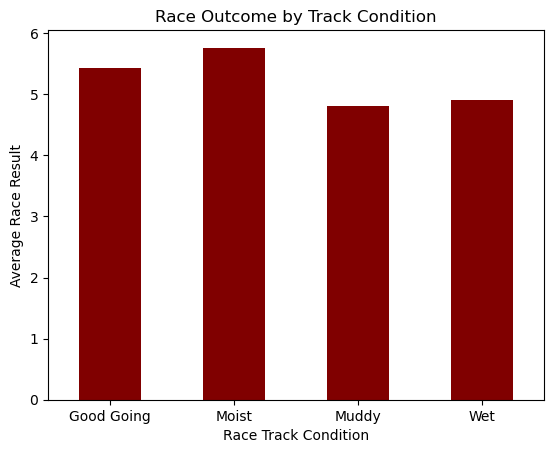

In [20]:
#How do track conditions impact race outcomes and horse performances?
#Calculate the average race result to see how horses perform in different track conditions
race_result_by_condition = clean.groupby('race_track_condition')['result'].mean()  

race_result_by_condition.plot(kind='bar', color='maroon')
plt.title('Race Outcome by Track Condition')
plt.xlabel('Race Track Condition')
plt.ylabel('Average Race Result')
plt.xticks(rotation=0)
plt.show()

In [18]:
#Do certain horses or jockeys perform better in specific track conditions?
#Get the 1st place performers for each race track condition
top_1_by_condition = first_winners.groupby('race_track_condition').first()
top_1_by_condition[['horse_name', 'jockey_name', 'result']]

,horse_name,jockey_name,result
race_track_condition,,,
Good Going,MY REVERIE,TUGAY ALICI,1
Moist,HULKİ,NEVZAT AVCİ,1
Muddy,BERİD,MUHAMMED MİR BİLGİN,1
Wet,DUMANLI PARS,SADIK ALTAY,1


In [80]:
#How does the distribution of race lengths vary by track type?
#Calculate the count of races for each track type and race length
race_length_distribution = clean.groupby(['race_track_type', 'race_length']).size().unstack(fill_value=0)
race_length_distribution

race_length,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200
race_track_type,,,,,,,,,,,
Dirt,560,292,1086,103,148,151,163,378,280,120,29
Dirt (Polytrack),128,76,245,217,8,64,0,0,130,84,21


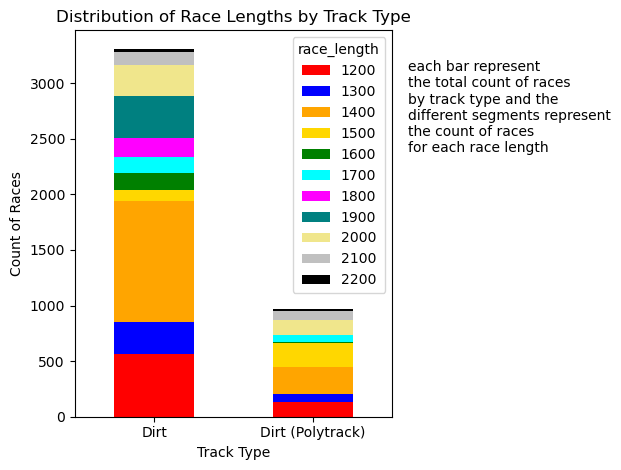

In [84]:
#Plot the race length distribution
race_length_distribution.plot(kind='bar', stacked=True, color=['red', 'blue', 'orange', 'gold', 'green', 'cyan', 'magenta', 'teal', 'khaki', 'silver', 'black'])

#Comment next to the bar chart
plt.text(1.05, 0.8, 'each bar represent\nthe total count of races\nby track type and the\ndifferent segments represent\nthe count of races\nfor each race length', horizontalalignment='left', verticalalignment='center', rotation=0, transform=plt.gca().transAxes, fontsize=10, color='black')

plt.title('Distribution of Race Lengths by Track Type')
plt.xlabel('Track Type')
plt.ylabel('Count of Races')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [75]:
#How do horses' performances vary across different race lengths and track types?
#Calculate the average race result to see how horses perform across different race lengths and track types
avg_performance = clean.groupby(['race_length', 'race_track_type'])[race_result].mean().unstack(fill_value=0)
avg_performance

race_track_type,Dirt,Dirt (Polytrack)
race_length,,
1200,5.858929,5.437500
1300,5.345890,5.065789
1400,5.235727,5.934694
1500,5.737864,5.474654
1600,4.533784,4.375000
1700,7.066225,5.156250
1800,5.993865,0.000000
1900,4.785714,0.000000
2000,5.292857,5.238462


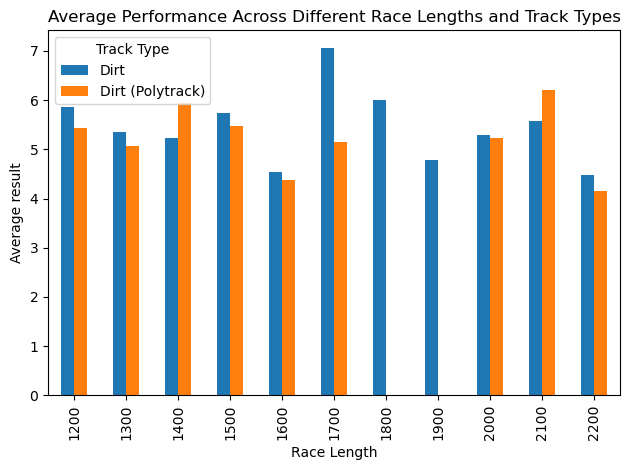

In [85]:
#Plot horses' performances across different race lengths and track types
avg_performance.plot(kind='bar', stacked=False)
plt.title('Average Performance Across Different Race Lengths and Track Types')
plt.xlabel('Race Length')
plt.ylabel('Average ' + race_result)
plt.legend(title='Track Type', loc='upper left')
plt.tight_layout()
plt.show()